<a href="https://colab.research.google.com/github/kusum1984/mlproject1/blob/main/Dieases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 5, 2, 1, 2, 3, 2, 2, 3, 2, 1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 5, 2, 1, 2, 3, 2, 2, 3, 2, 1, 4]
96


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


SVC
Scores: [0.7        0.7        1.         1.         0.7        0.7
 0.88888889 0.88888889 0.66666667 0.66666667]
Mean Score: 0.7911111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Accuracy on train data by SVM Classifier: 94.73684210526315
Accuracy on test data by SVM Classifier: 70.0


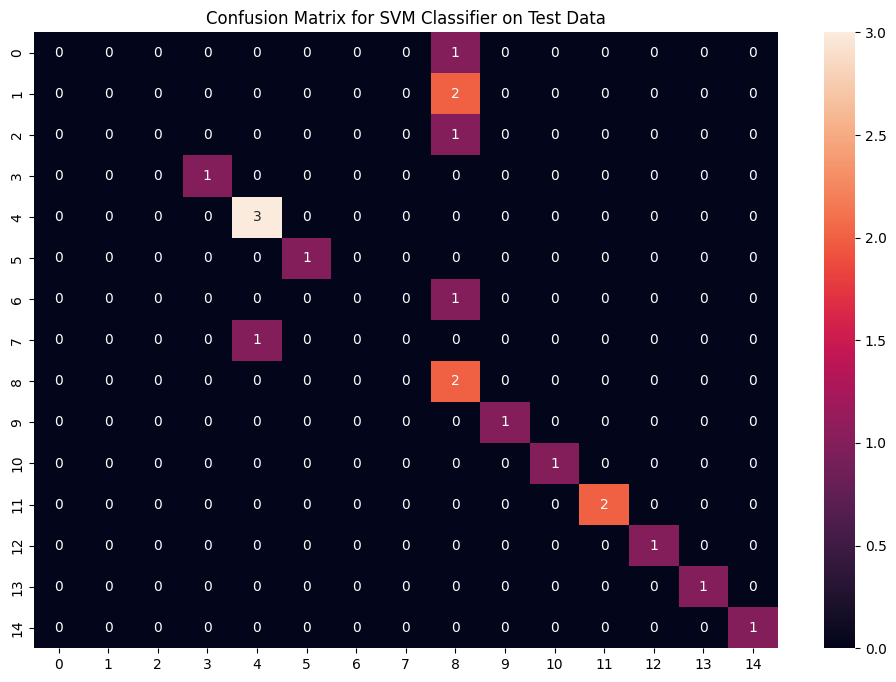

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 90.0


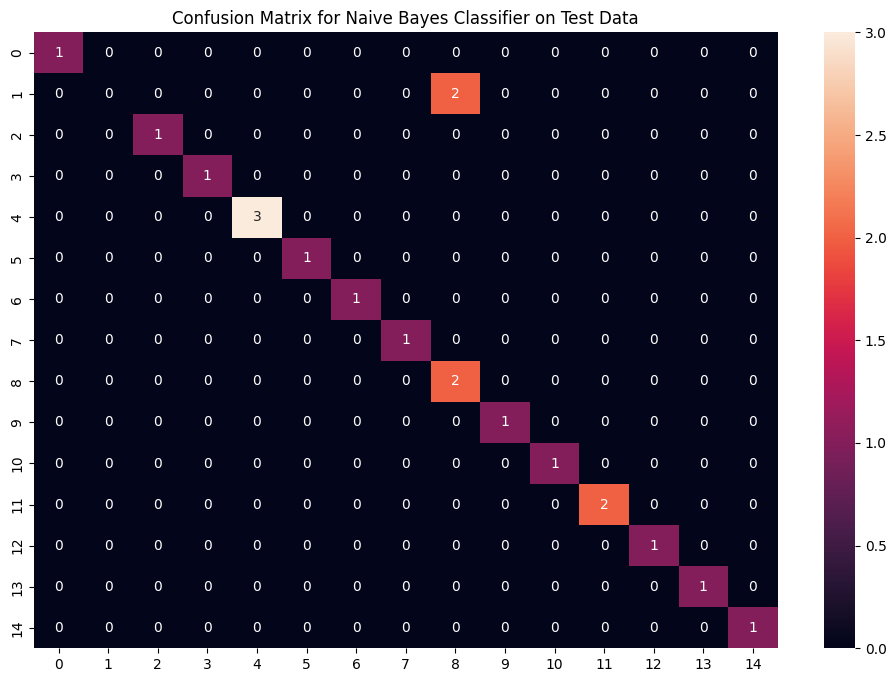

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 90.0


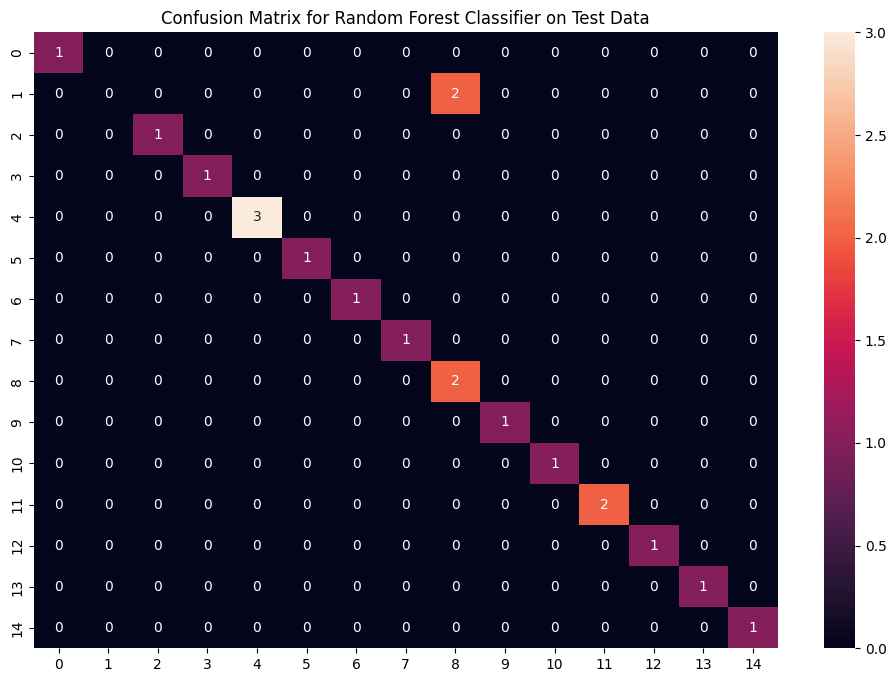

In [44]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Larger dataset with more diseases and symptoms
"""
data = {
    'symptoms': ["fever cough headache", "fatigue sore throat", "fever body ache", "cough runny nose",
                 "chills fatigue headache", "sneezing sore throat", "muscle pain fever", "runny nose headache",
                 "fever cough", "sore throat cough", "headache runny nose", "fever fatigue headache",
                 "cough sore throat", "sneezing runny nose", "fatigue muscle pain", "body ache chills",
                 "shortness of breath", "chest pain", "nausea vomiting", "abdominal pain", "diarrhea",
                 "sweating", "loss of appetite", "joint pain", "back pain", "dizziness", "weakness",
                 "loss of taste", "loss of smell", "rash", "red eyes", "blurred vision", "irritability",
                 "swollen glands", "burning sensation", "numbness", "tingling sensation", "hair loss",
                 "difficulty swallowing", "hoarse voice", "palpitations", "excessive thirst", "excessive hunger",
                 "frequent urination", "night sweats", "chest tightness", "heartburn", "acid reflux",
                 "bloody stool", "bloody vomit", "jaundice", "pale skin", "heavy menstrual bleeding",
                 "vaginal discharge", "testicular pain", "urinary urgency", "urinary retention",
                 "painful urination", "difficulty breathing", "coughing up blood", "wheezing", "dry mouth",
                 "difficulty sleeping", "nightmares", "hallucinations", "delusions", "paranoia",
                 "confusion", "memory loss", "difficulty concentrating", "mood swings", "anxiety",
                 "depression", "suicidal thoughts", "impulsivity"],
    'disease': ["flu", "common cold", "flu", "common cold", "flu", "common cold", "flu", "common cold",
                "flu", "common cold", "common cold", "flu", "common cold", "common cold", "flu", "flu",
                "pneumonia", "heart attack", "food poisoning", "appendicitis", "gastroenteritis",
                "heat stroke", "food allergy", "arthritis", "muscle strain", "migraine", "anemia",
                "COVID-19", "sinus infection", "ear infection", "conjunctivitis", "hypertension",
                "diabetes", "asthma", "eczema", "psoriasis", "hypothyroidism", "hyperthyroidism",
                "gastroesophageal reflux disease", "peptic ulcer disease", "hepatitis", "cirrhosis",
                "pancreatitis", "kidney stones", "urinary tract infection", "prostatitis",
                "endometriosis", "ovarian cyst", "uterine fibroids", "polycystic ovary syndrome",
                "testicular cancer", "prostate cancer", "ovarian cancer", "endometrial cancer",
                "leukemia", "lymphoma", "melanoma", "breast cancer", "colon cancer", "lung cancer",
                "liver cancer", "kidney cancer", "bladder cancer", "esophageal cancer", "stomach cancer",
                "pancreatic cancer", "brain tumor", "spinal cord tumor", "multiple sclerosis",
                "amyotrophic lateral sclerosis", "Parkinson's disease", "Alzheimer's disease",
                "schizophrenia", "bipolar disorder", "obsessive-compulsive disorder",
                "post-traumatic stress disorder", "attention deficit hyperactivity disorder",
                "major depressive disorder", "anorexia nervosa", "bulimia nervosa", "binge eating disorder"]
}
"""
data = {
    'symptoms': ["fever cough headache", "fatigue sore throat", "fever body ache", "cough runny nose",
                 "chills fatigue headache", "sneezing sore throat", "muscle pain fever", "runny nose headache",
                 "fever cough", "sore throat cough", "headache runny nose", "fever fatigue headache",
                 "cough sore throat", "sneezing runny nose", "fatigue muscle pain", "body ache chills",
                 "shortness of breath", "chest pain", "nausea vomiting", "abdominal pain", "diarrhea",
                 # Add more symptoms here...
                 "dizziness weakness", "joint pain", "rash fever", "stomach cramps", "sore muscles",
                 "earache", "itchy eyes", "swollen glands", "numbness tingling", "blurred vision",
                 "loss of appetite", "dehydration", "difficulty swallowing", "excessive sweating",
                 "hoarse voice", "jaw pain", "loss of taste or smell", "night sweats", "palpitations",
                 "red eyes", "sensitivity to light", "swollen tonsils", "tight chest", "unexplained weight loss",
                 "vomiting blood", "wheezing", "yellow skin or eyes","fever cough headache", "fatigue sore throat", "fever body ache", "cough runny nose",
                 "chills fatigue headache", "sneezing sore throat", "muscle pain fever", "runny nose headache",
                 "fever cough", "sore throat cough", "headache runny nose", "fever fatigue headache",
                 "cough sore throat", "sneezing runny nose", "fatigue muscle pain", "body ache chills",
                 "shortness of breath", "chest pain", "nausea vomiting", "abdominal pain", "diarrhea",
                 # Add more symptoms here...
                 "dizziness weakness", "joint pain", "rash fever", "stomach cramps", "sore muscles",
                 "earache", "itchy eyes", "swollen glands", "numbness tingling", "blurred vision",
                 "loss of appetite", "dehydration", "difficulty swallowing", "excessive sweating",
                 "hoarse voice", "jaw pain", "loss of taste or smell", "night sweats", "palpitations",
                 "red eyes", "sensitivity to light", "swollen tonsils", "tight chest", "unexplained weight loss",
                 "vomiting blood", "wheezing", "yellow skin or eyes"],
    'disease': ["flu", "common cold", "flu", "common cold", "flu", "common cold", "flu", "common cold",
                "flu", "common cold", "common cold", "flu", "common cold", "common cold", "flu", "flu",
                "pneumonia", "heart attack", "food poisoning", "appendicitis", "gastroenteritis",
                # Corresponding diseases for the additional symptoms...
                "migraine", "arthritis", "measles", "food intolerance", "fibromyalgia",
                "ear infection", "allergic conjunctivitis", "tonsillitis", "peripheral neuropathy", "migraine",
                "anorexia nervosa", "heat exhaustion", "esophageal dysphagia", "hyperhidrosis",
                "laryngitis", "temporomandibular joint disorder", "COVID-19", "tuberculosis", "arrhythmia",
                "conjunctivitis", "migraine", "tonsillitis", "asthma", "cancer", "gastrointestinal bleeding",
                "asthma", "jaundice","flu", "common cold", "flu", "common cold", "flu", "common cold", "flu", "common cold",
                "flu", "common cold", "common cold", "flu", "common cold", "common cold", "flu", "flu",
                "pneumonia", "heart attack", "food poisoning", "appendicitis", "gastroenteritis",
                # Corresponding diseases for the additional symptoms...
                "migraine", "arthritis", "measles", "food intolerance", "fibromyalgia",
                "ear infection", "allergic conjunctivitis", "tonsillitis", "peripheral neuropathy", "migraine",
                "anorexia nervosa", "heat exhaustion", "esophageal dysphagia", "hyperhidrosis",
                "laryngitis", "temporomandibular joint disorder", "COVID-19", "tuberculosis", "arrhythmia",
                "conjunctivitis", "migraine", "tonsillitis", "asthma", "cancer", "gastrointestinal bleeding",
                "asthma", "jaundice"]
}
# Create DataFrame
df = pd.DataFrame(data)
df = pd.DataFrame(data)
symptoms_lengths = [len(symptoms.split()) for symptoms in data['symptoms']]
disease_length = len(data['disease'])

print(symptoms_lengths)
print(disease_length)

# Text preprocessing
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Tokenize symptoms
df['tokenized_symptoms'] = df['symptoms'].apply(preprocess_text)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=df['tokenized_symptoms'], vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to vector
def text_to_vector(text):
    text_vector = np.zeros((word2vec_model.vector_size,))
    count = 0
    for word in text:
        if word in word2vec_model.wv:
            text_vector += word2vec_model.wv[word]
            count += 1
    if count != 0:
        text_vector /= count
    return text_vector

# Convert symptom descriptions to vectors and align with target labels
X = np.array([text_to_vector(symptoms) for symptoms in df['tokenized_symptoms']])
y = df['disease']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Models
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring='accuracy')
    print("="*50)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Text(0.5, 1.0, 'Distribution of Diseases')

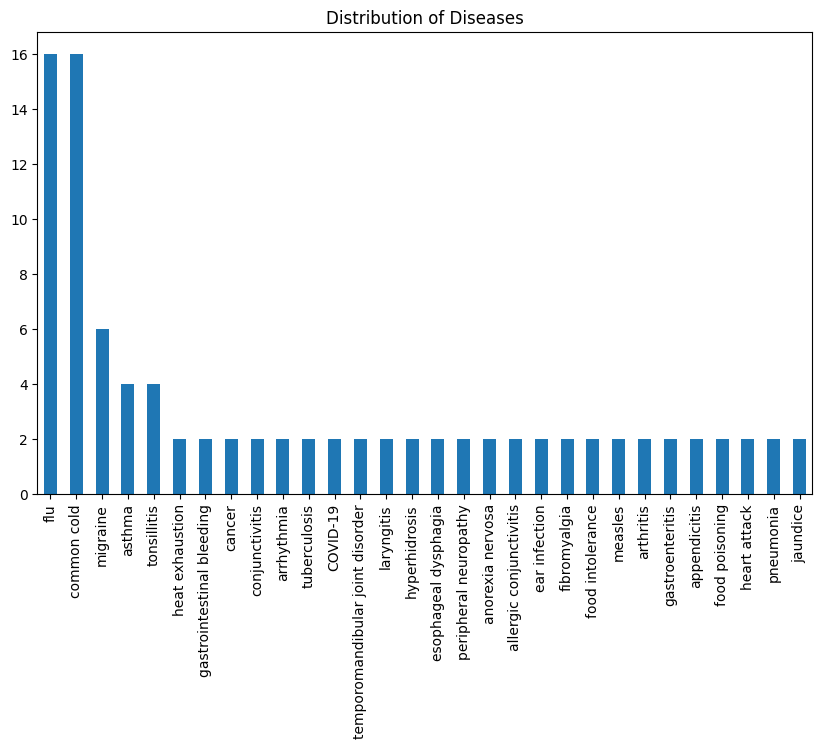

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Count occurrences of each disease
disease_counts = df['disease'].value_counts()

# Plot the distribution of diseases
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar')
plt.title('Distribution of Diseases')


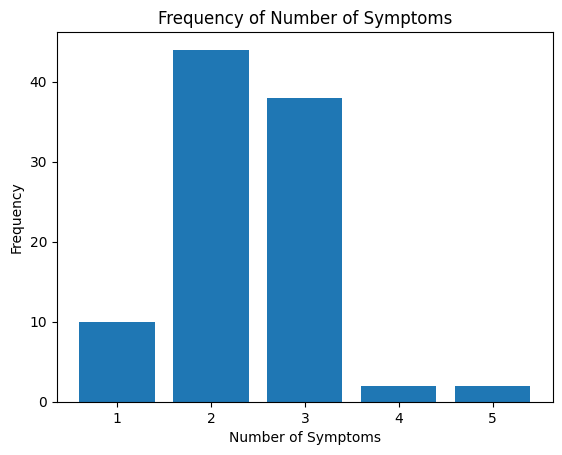

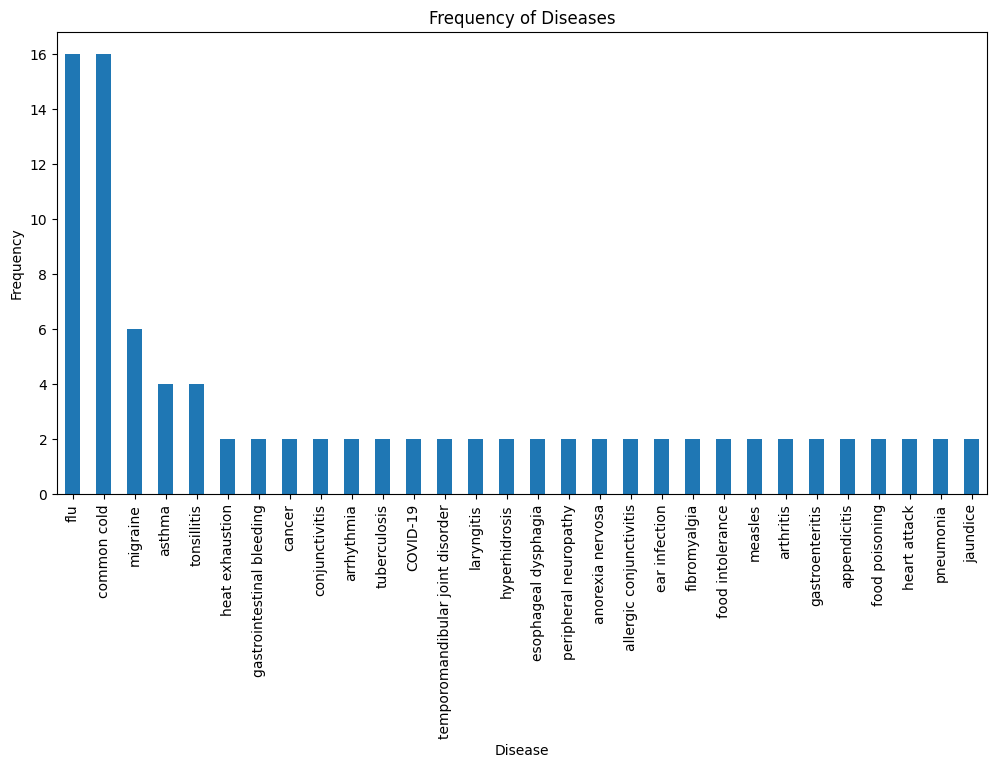

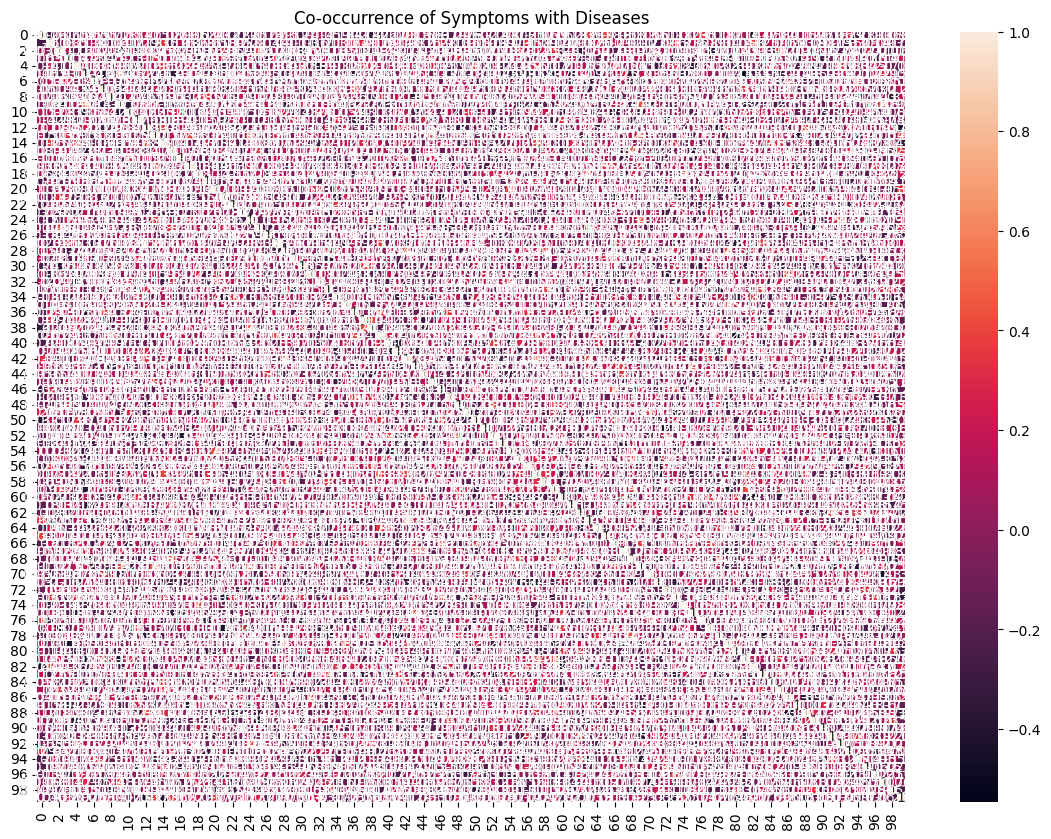

In [47]:
# Symptoms Analysis
symptom_freq = df['symptoms'].apply(lambda x: len(x.split())).value_counts().sort_index()
plt.bar(symptom_freq.index, symptom_freq.values)
plt.xlabel('Number of Symptoms')
plt.ylabel('Frequency')
plt.title('Frequency of Number of Symptoms')
plt.show()

# Disease Analysis
plt.figure(figsize=(12, 6))
df['disease'].value_counts().plot(kind='bar')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title('Frequency of Diseases')
plt.xticks(rotation=90)
plt.show()

# Symptoms-Disease Relationship
symptoms_diseases = df.groupby('disease')['symptoms'].apply(lambda x: ' '.join(x)).reset_index()
symptoms_diseases['symptoms'] = symptoms_diseases['symptoms'].apply(lambda x: preprocess_text(x))
symptoms_diseases['symptoms'] = symptoms_diseases['symptoms'].apply(lambda x: ' '.join(x))

# Tokenize symptoms for Word2Vec model
symptoms_diseases['tokenized_symptoms'] = symptoms_diseases['symptoms'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=symptoms_diseases['tokenized_symptoms'], vector_size=100, window=5, min_count=1, workers=4)

# Plotting co-occurrence of symptoms with diseases
plt.figure(figsize=(14, 10))
sns.heatmap(pd.DataFrame(word2vec_model.wv[symptoms_diseases['tokenized_symptoms'].sum()]).corr(), annot=True)
plt.title('Co-occurrence of Symptoms with Diseases')
plt.show()


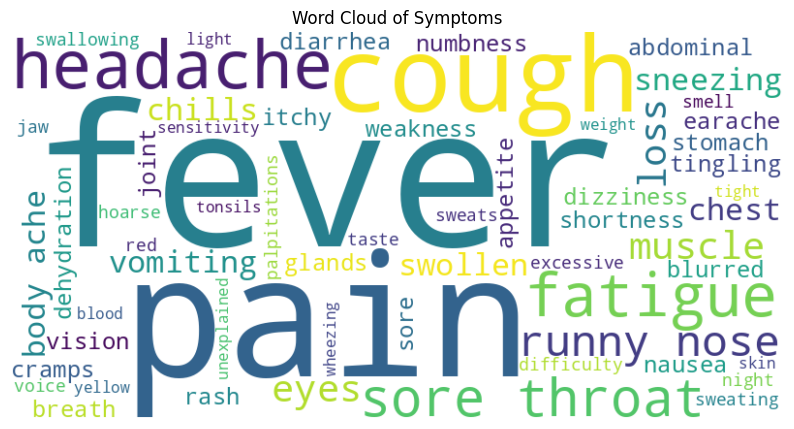

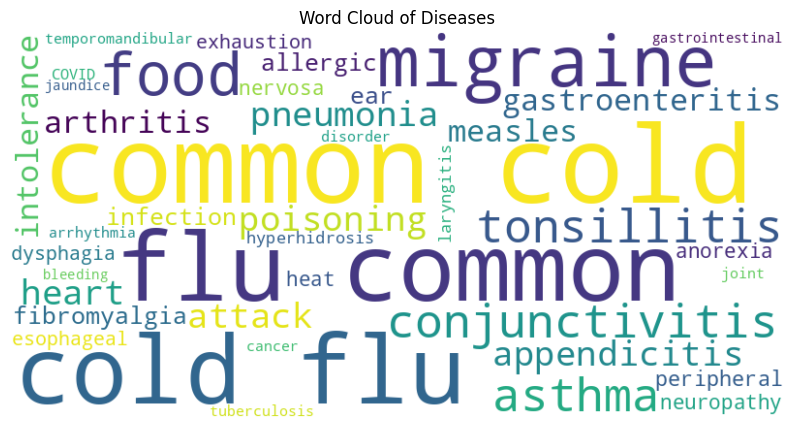

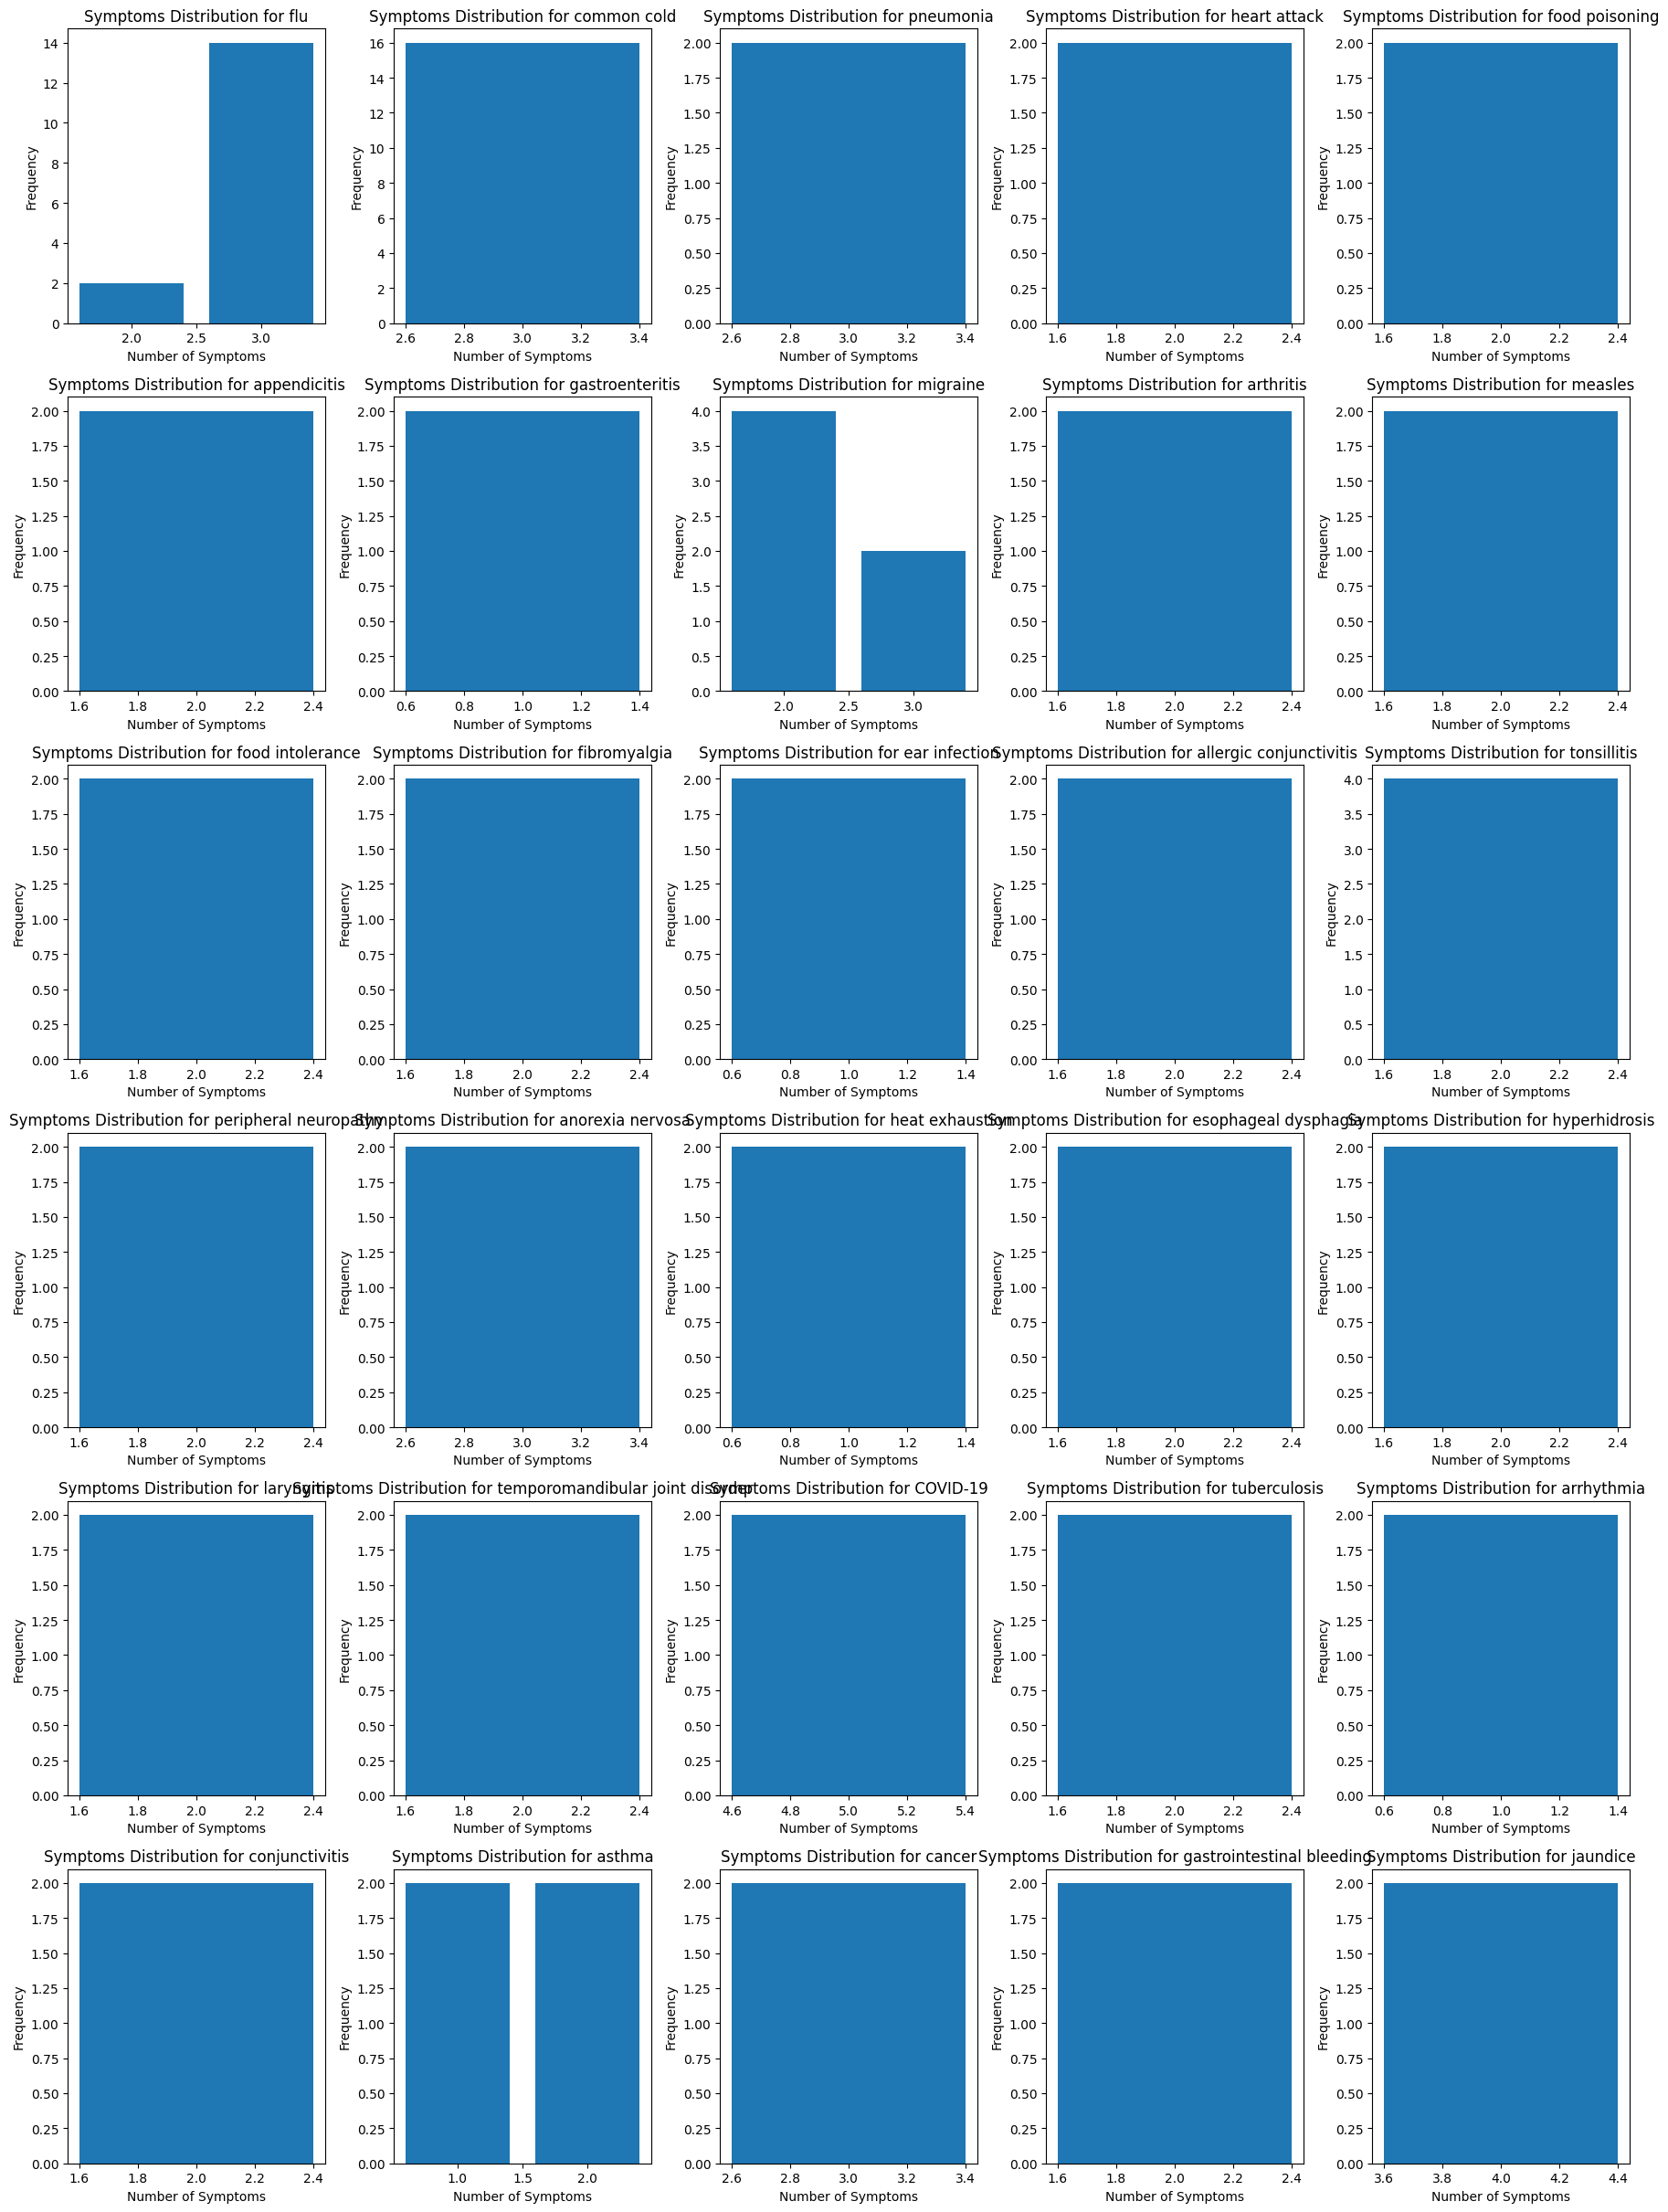

In [48]:
from wordcloud import WordCloud

# Symptoms Word Cloud
symptoms_text = ' '.join(df['symptoms'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(symptoms_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Symptoms')
plt.axis('off')
plt.show()

# Disease Word Cloud
disease_text = ' '.join(df['disease'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disease_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Diseases')
plt.axis('off')
plt.show()

# Symptoms Distribution by Disease
plt.figure(figsize=(18, 40))
for i, disease in enumerate(df['disease'].unique(), 1):
    plt.subplot(10, 5, i)
    symptoms_count = df[df['disease'] == disease]['symptoms'].apply(lambda x: len(x.split())).value_counts().sort_index()
    plt.bar(symptoms_count.index, symptoms_count.values)
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Frequency')
    plt.title(f'Symptoms Distribution for {disease}')
plt.tight_layout()
plt.show()


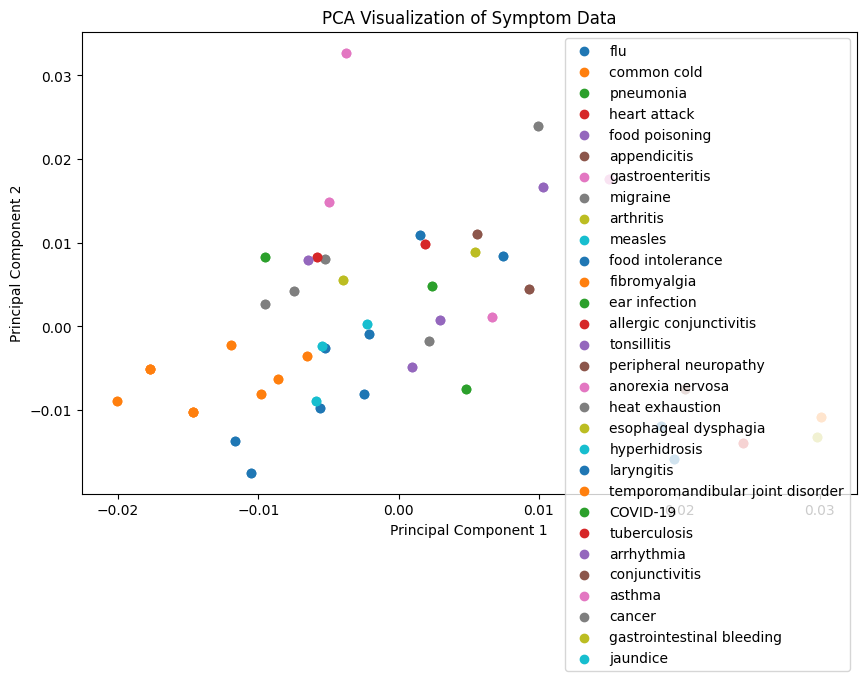

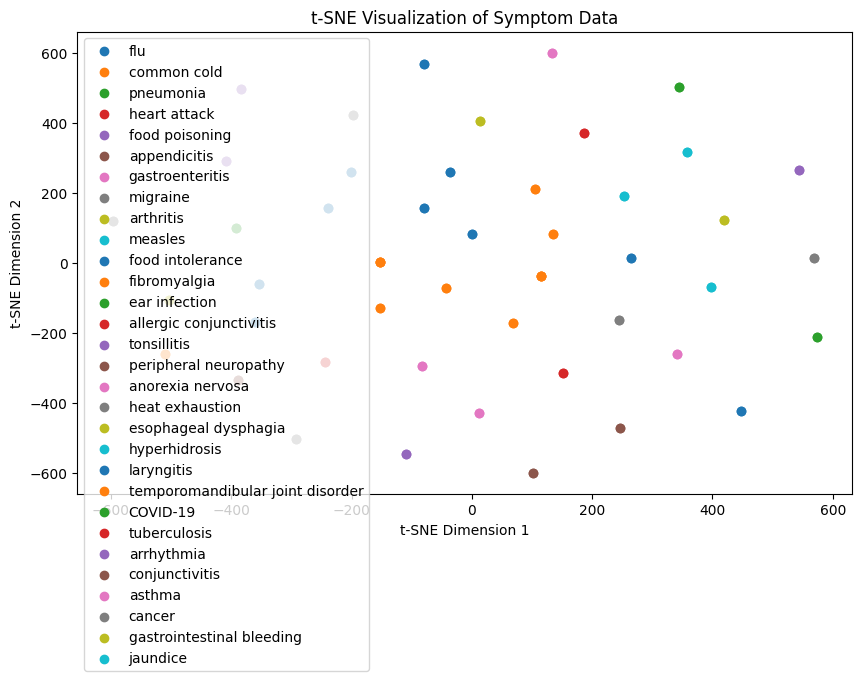

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
for disease in df['disease'].unique():
    indices = df[df['disease'] == disease].index
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=disease)
plt.title('PCA Visualization of Symptom Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(10, 6))
for disease in df['disease'].unique():
    indices = df[df['disease'] == disease].index
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=disease)
plt.title('t-SNE Visualization of Symptom Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
